# 3. Visualizing Data

###  Two primary uses for data visualization:
- To explore data
- To communicate data
<br/><br/>
- Data visualization is a rich field of study that deserves its own book.

## matplotlib

- Widely used
- Good for simple bar charts, line charts, and scatterplots

- matplotlib.pyplot module

In [1]:
import matplotlib.pyplot as plt

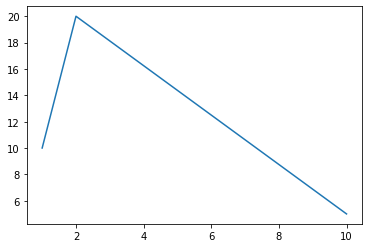

In [2]:
plt.plot([1,2,10],[10,20,5])
plt.show()

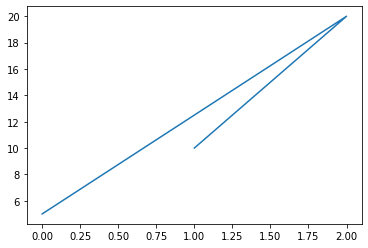

In [3]:
plt.plot([1,2,0],[10,20,5])
plt.show()

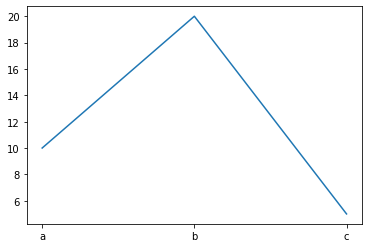

In [4]:
plt.plot(['a','b','c'],[10,20,5])
plt.show()

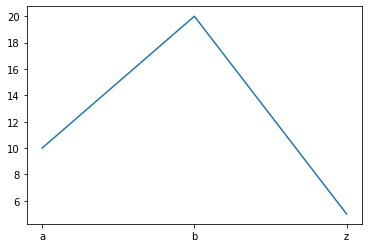

In [5]:
plt.plot(['a','b','z'],[10,20,5])  # just rank
plt.show()

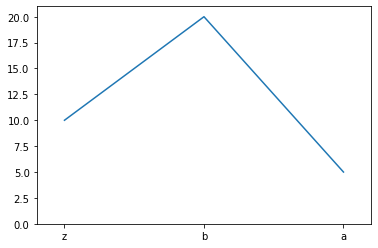

In [6]:
plt.axis([-0.2,2.2,0,21])
plt.plot(['z','b','a'],[10,20,5])
plt.show()

In [7]:
def make_chart_simple_line_chart():
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

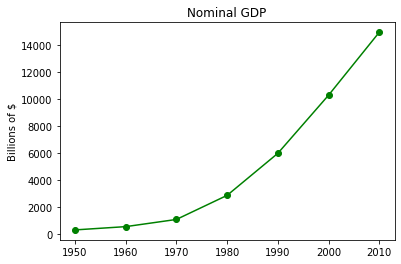

In [8]:
make_chart_simple_line_chart()

In [73]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## Bar Charts

- A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items.

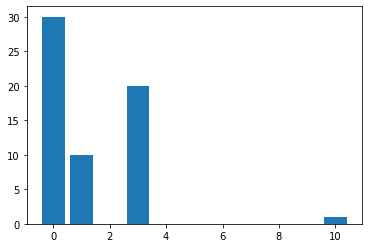

In [10]:
plt.bar([1, 3, 0,10],[10,20,30,1])
plt.show()

In [11]:
def make_chart_simple_bar_chart():
    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.5 for i, _ in enumerate(movies)]
    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i for i, _ in enumerate(movies)], movies)

    plt.show()

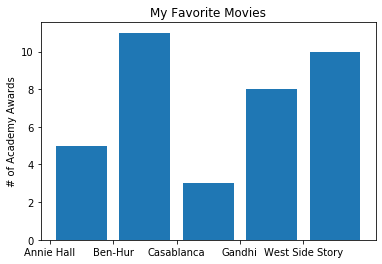

In [12]:
make_chart_simple_bar_chart()

- A bar chart can also be a good choice for plotting **histograms of bucketed numeric values**, in order to visually explore how the values are distributed

In [13]:
from collections import Counter

def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x + 5 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

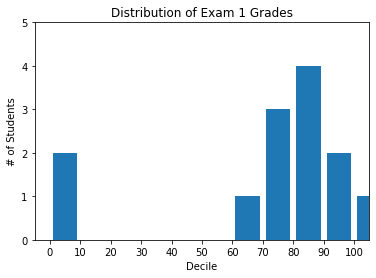

In [14]:
make_chart_histogram()

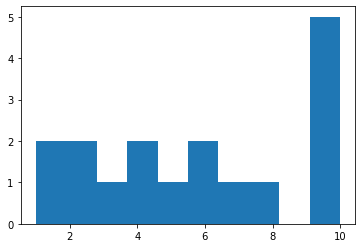

In [72]:
data = [1,2,3,4,5,6,7,8,1,2,4,6,10,10,10,10,10]
plt.hist(data, bins=10)
plt.show()

## Misleading bar chart

In [15]:
def make_chart_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()

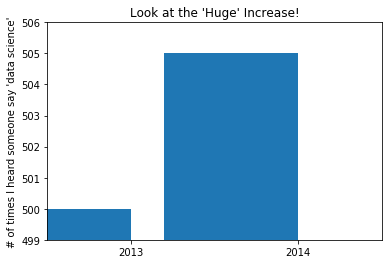

In [16]:
make_chart_misleading_y_axis()

- Use more-sensible axes,

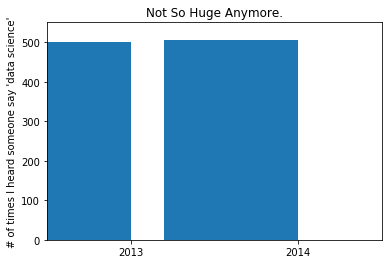

In [17]:
make_chart_misleading_y_axis(mislead=False)

## Line Charts

- Line charts using plt.plot()
- A good choice for showing **trends**

In [76]:
def make_chart_several_line_charts():

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=5) 
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

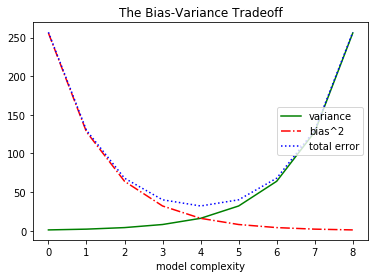

In [77]:
make_chart_several_line_charts()

In [41]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## Scatter plots

- Right choice for visualizing the **relationship between two paired** sets of data.
- Relationship between the number of friends your users have and the number of minutes they spend on the site every day

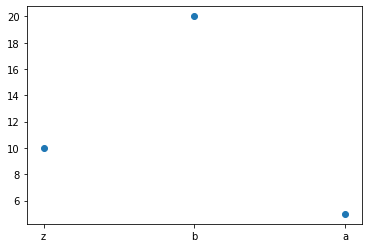

In [21]:
plt.scatter(['z','b','a'],[10,20,5])
plt.show()

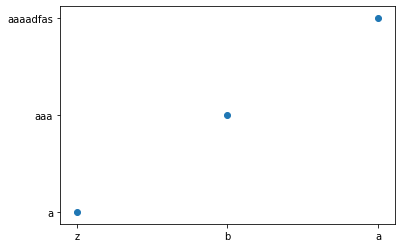

In [68]:
plt.scatter(['z','b','a'],['a','aaa', 'aaaadfas'])
#plt.axis()
plt.show()

In [23]:
def make_chart_scatter_plot():
    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

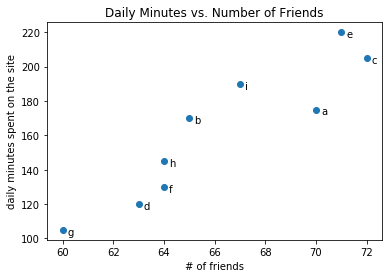

In [24]:
make_chart_scatter_plot()

- If you’re scattering comparable variables, you might get a misleading picture **if you let matplotlib choose the scale**

In [25]:
def make_chart_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

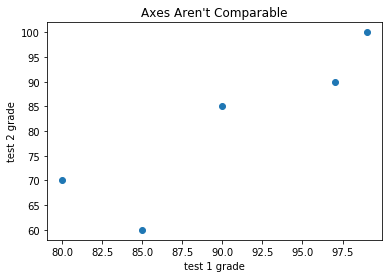

In [26]:
make_chart_scatterplot_axes()

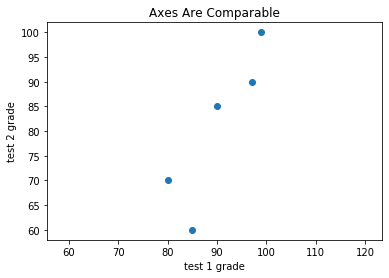

In [27]:
make_chart_scatterplot_axes(equal_axes=True)

### Always try to read help page

In [28]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*args, **kwargs)
    Convenience method to get or set some axis properties.
    
    Call signatures::
    
      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)
    
    Parameters
    ----------
    xmin, xmax, ymin, ymax : float, optional
        The axis limits to be set. Either none or all of the limits must
        be given. This can also be achieved using ::
    
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    option : bool or str
        If a bool, turns axis lines and labels on or off. If a string,
        possible values are:
    
        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels. Same as ``Tru

## Pie Charts

-  Circle divided into slices to illustrate **numerical proportion**

In [29]:
def make_chart_pie_chart():
    plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])
#     plt.pie([2, 1], labels=["Uses pie charts", "Knows better"])
    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()

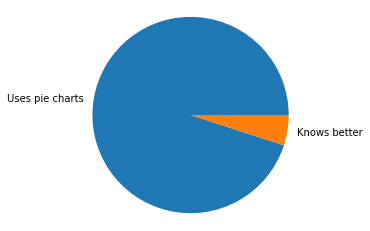

In [30]:
make_chart_pie_chart()

### Data scientists move to bokeh

- Bokeh is a newer library that brings D3-style (interactive) visualizations into Python

- https://demo.bokeh.org/movies

In [31]:
# Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import random

friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]

#friends = [i + 3 * random.random() for i in friends for _ in range(100)]
#minutes = [i + 50 * random.random() for i in minutes for _ in range(100)]
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Set up a generic figure() object
fig = figure(tools=TOOLS)
fig.scatter(friends, minutes)
# See what it looks like
show(fig)

Loading BokehJS ...

## Complete Example

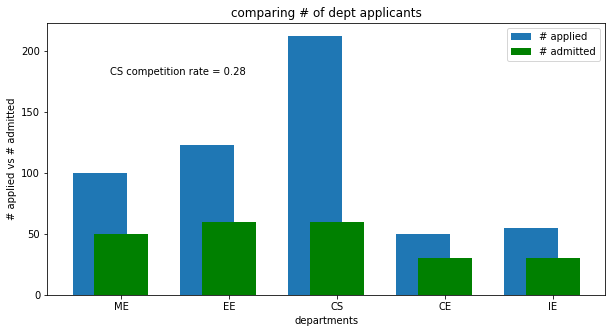

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))      # this must be the first in plt
dept_names = ['ME', 'EE', 'CS', 'CE', 'IE']
num_apps   = [100, 123, 212, 50, 55]
num_adms   = [50, 60, 60, 30, 30]

plt.bar(np.array(range(len(dept_names))) - 0.2, num_apps, width = 0.5, label='# applied')
plt.bar(range(len(dept_names)), num_adms, color='g', width = 0.5, label='# admitted')
plt.xticks(range(len(dept_names)), dept_names)
plt.yticks(range(0,250,50))
plt.legend(loc=1)
plt.title('comparing # of dept applicants')
plt.xlabel("departments")
plt.ylabel("# applied vs # admitted")
#plt.axis([-0.5,4.1,30,1000])
plt.annotate('CS competition rate = {:.2}'.format(num_adms[2]/num_apps[2]), xy=(-0.1,180))
plt.show()

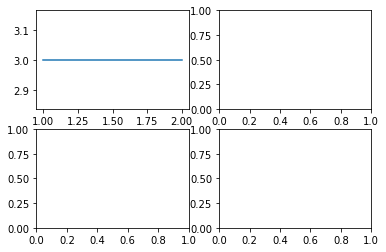

In [66]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot([1,2], [3,3])